<a href="https://colab.research.google.com/github/bernardoqueiroz/EducaMais/blob/main/GrupoD_SR2_(Vers%C3%A3o_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats
from scipy.stats import shapiro
import pylab 
%matplotlib inline

# Nova Análise - Banco de Dados Evasão Escolar (SR1)


In [ ]:
df = pd.read_csv("Dropout_Academic.csv", encoding="latin1")

##Entendendo Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
drop_grad = df.loc[(df.Target == "Dropout") | (df.Target == "Graduate")]

Obs.: descomentar a celula abaixo para remover os outliers do limite inferior que tiraram nota 0, após descomentar é necessario executar todo o notebook para ver as mudanças e evitar erros.

In [ ]:
#drop_grad = drop_grad.loc[drop_grad["Curricular units 2nd sem (grade)"] >= 10]

In [ ]:
dropouts = drop_grad.loc[df.Target == "Dropout"]
len(dropouts)

1421

In [ ]:
graduate = drop_grad.loc[df.Target == "Graduate"]
len(graduate)

2209

##Criando novo campo = Quantidade de matérias que alguém reprovou


In [ ]:
drop_grad["Curricular units 1st sem (failed)"] = drop_grad["Curricular units 1st sem (enrolled)"] - drop_grad["Curricular units 1st sem (approved)"]
drop_grad["Curricular units 2nd sem (failed)"] = drop_grad["Curricular units 2nd sem (enrolled)"] - drop_grad["Curricular units 2nd sem (approved)"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Matriz Correlação

In [ ]:
features = ["Previous qualification (grade)", "Admission grade", "Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Target", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (failed)"]
drop_grad_features = pd.get_dummies(drop_grad[features], drop_first="true")

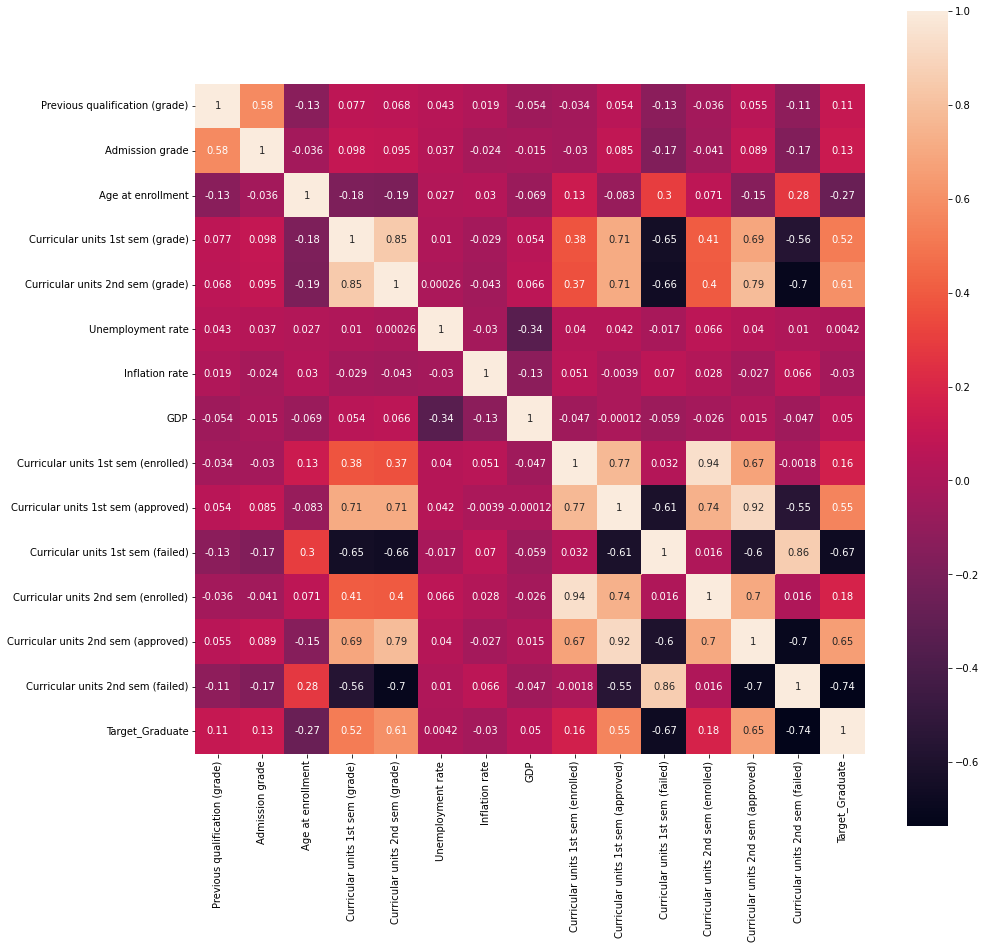

In [ ]:
corrmat = drop_grad_features.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

In [ ]:
features2 = ["Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Target", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (failed)"]
drop_grad_features2 = pd.get_dummies(drop_grad[features2], drop_first="true")

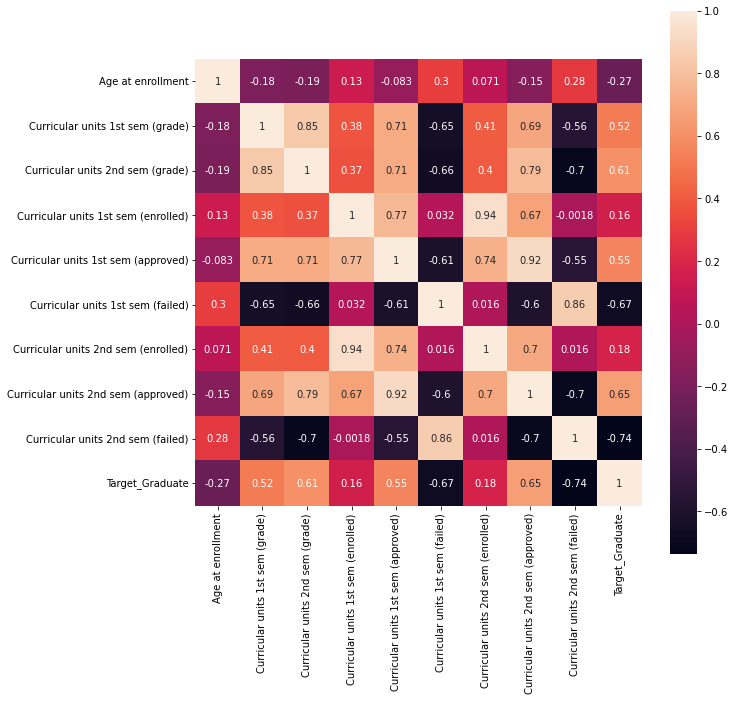

In [ ]:
corrmat = drop_grad_features2.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

##Separação 70/30 + Seleção 3 amostras

In [ ]:
feats = ["Previous qualification (grade)", "Admission grade", "Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (failed)"]
X = drop_grad_features[feats]
y = drop_grad_features["Target_Graduate"]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=0)

In [ ]:
amostra1 = X_train.sample(frac=0.3)
amostra2 = X_train.sample(frac=0.3)
amostra3 = X_train.sample(frac=0.3)

##Teste de normalidade entre as amostras

H0: A distribuição de todos os dados númericos da base seguem a curva Normal.

H1: A distribuição de todos os dados númericos da base não seguem uma curva Normal.

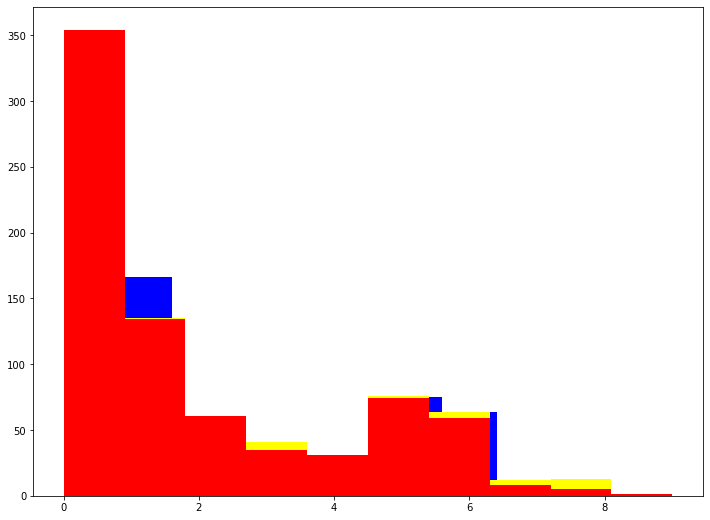

In [ ]:
plt.figure(figsize=(12, 9))
plt.hist(amostra1["Curricular units 2nd sem (failed)"],  color='blue')
plt.hist(amostra2["Curricular units 2nd sem (failed)"],  color='yellow')
plt.hist(amostra3["Curricular units 2nd sem (failed)"],  color='red')
plt.show()

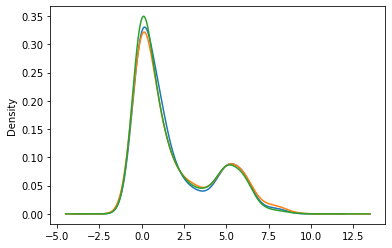

In [ ]:
amostra1["Curricular units 2nd sem (failed)"].plot(kind='density')
amostra2["Curricular units 2nd sem (failed)"].plot(kind='density')
amostra3["Curricular units 2nd sem (failed)"].plot(kind='density')
plt.show()

In [ ]:
print("Sample 1:")
scipy.stats.anderson(amostra1["Curricular units 2nd sem (failed)"], dist='norm')

Sample 1:


AndersonResult(statistic=70.79293776279417, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

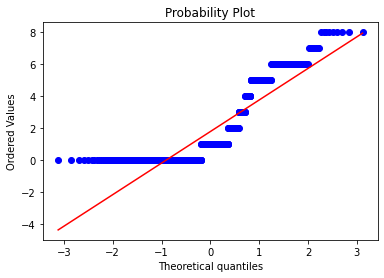

In [ ]:
scipy.stats.probplot(amostra1["Curricular units 2nd sem (failed)"], dist="norm", plot=pylab)
pylab.show()

In [ ]:
print("Sample 2:")
scipy.stats.anderson(amostra2["Curricular units 2nd sem (failed)"], dist='expon')

Sample 2:


AndersonResult(statistic=inf, critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.955]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

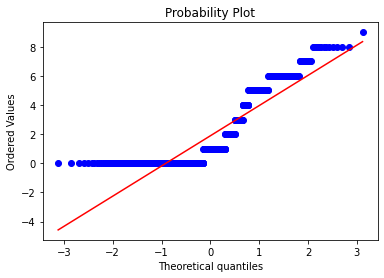

In [ ]:
scipy.stats.probplot(amostra2["Curricular units 2nd sem (failed)"], dist="norm", plot=pylab)
pylab.show()

In [ ]:
print("Sample 3:")
scipy.stats.anderson(amostra3["Curricular units 2nd sem (failed)"], dist='norm')

Sample 3:


AndersonResult(statistic=73.60271504299476, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

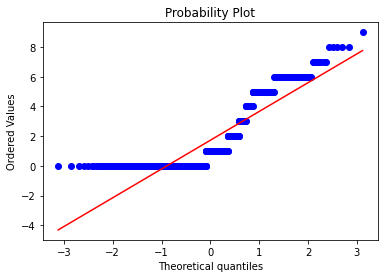

In [ ]:
scipy.stats.probplot(amostra3["Curricular units 2nd sem (failed)"], dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Exemplo do Teste de Normalidade de Shapiro-Wilk com todos os dados
from scipy.stats import shapiro

stat, p = shapiro(amostra3["Curricular units 2nd sem (failed)"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.768, p=0.000
Provavelmente NÃO é uma Distribuição Normal


##Teste de dependência entre as amostras

In [ ]:
# Exemplo de Teste de CorrelaÇão de Pearson
from scipy.stats import pearsonr

data1 = amostra1["Curricular units 2nd sem (failed)"]
data2 = amostra2["Curricular units 2nd sem (failed)"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=-0.029, p=0.426
Provavelmente Independente


##Teste de equidade entre as amostras

In [ ]:
# Examplo de Teste T - Student
from scipy.stats import ttest_ind

data1 = amostra1["Curricular units 2nd sem (failed)"]
data2 = amostra2["Curricular units 2nd sem (failed)"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

stat=-0.797, p=0.426
Provavelmente a mesma distribuição


##Boxplot

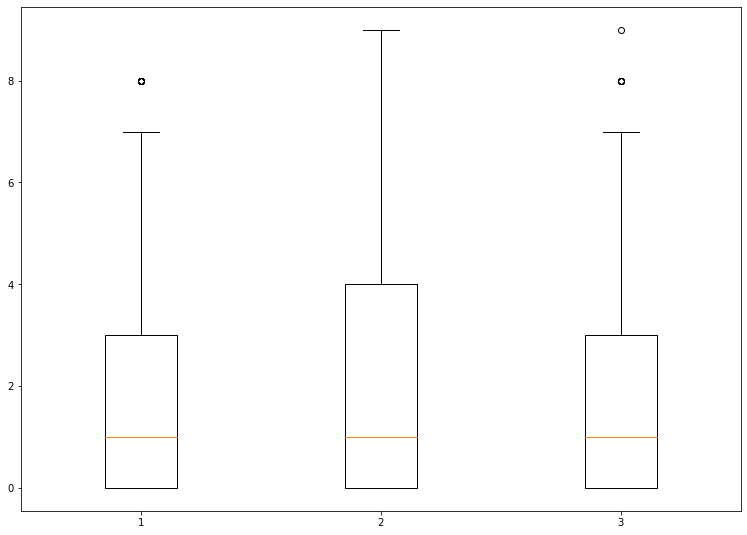

In [ ]:
data = [amostra1["Curricular units 2nd sem (failed)"], amostra2["Curricular units 2nd sem (failed)"], amostra3["Curricular units 2nd sem (failed)"]]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=amostra1["Curricular units 2nd sem (failed)"]))
fig.add_trace(go.Box(y=amostra2["Curricular units 2nd sem (failed)"]))
fig.add_trace(go.Box(y=amostra3["Curricular units 2nd sem (failed)"]))

fig.show()

##Análise Nota Segundo Semestre

In [ ]:
df_grade1 = amostra1["Curricular units 2nd sem (grade)"]
df_grade2 = amostra2["Curricular units 2nd sem (grade)"]
df_grade3 = amostra3["Curricular units 2nd sem (grade)"]

##Teste de normalidade entre as amostras

H0: A distribuição de todos os dados númericos da base seguem a curva Normal.

H1: A distribuição de todos os dados númericos da base não seguem uma curva Normal.

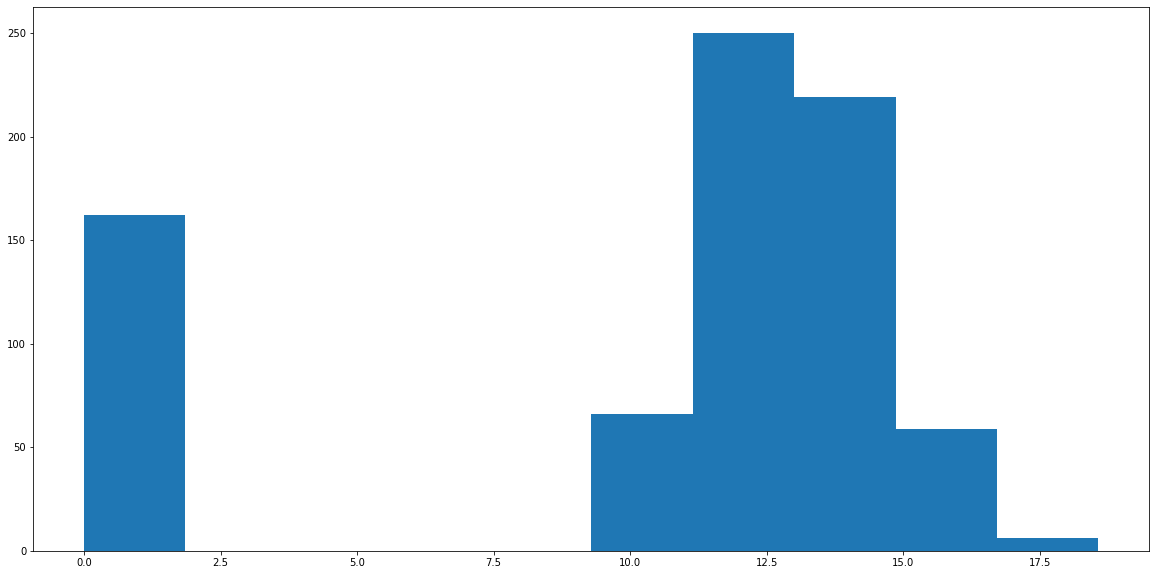

In [ ]:
df_grade1.hist(figsize=(20,10), grid = False)

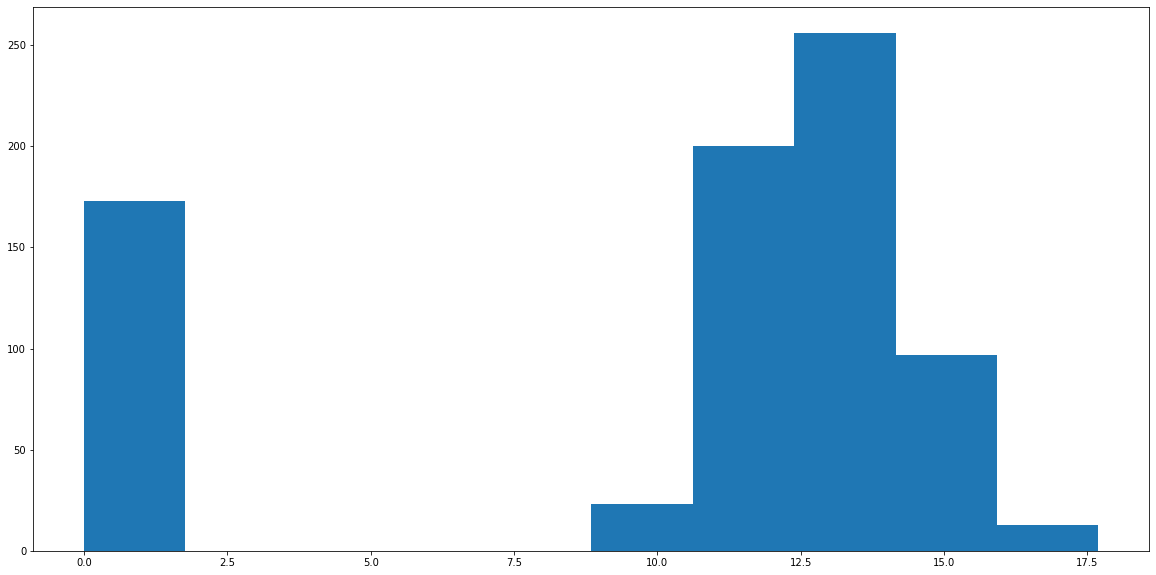

In [ ]:
df_grade2.hist(figsize=(20,10), grid = False)

In [ ]:
print("Teste Amostra1:")
scipy.stats.anderson(df_grade1, dist='norm')

Teste Amostra1:


AndersonResult(statistic=97.65831817010303, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
print("Sample 2:")
scipy.stats.anderson(df_grade2, dist='norm')


Sample 2:


AndersonResult(statistic=99.89780566386798, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
print("Sample 3")
scipy.stats.anderson(df_grade3, dist='norm')

Sample 3


AndersonResult(statistic=103.48212623058953, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
# Exemplo do Teste de Normalidade de Shapiro-Wilk com todos os dados
from scipy.stats import shapiro

stat, p = shapiro(df_grade2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.716, p=0.000
Provavelmente NÃO é uma Distribuição Normal


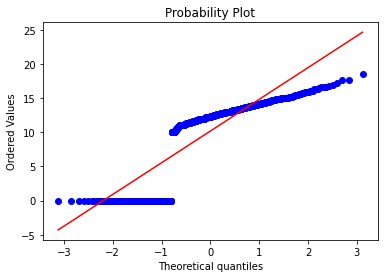

In [ ]:
#qqplot
scipy.stats.probplot(df_grade1, dist="norm", plot=pylab)
pylab.show()

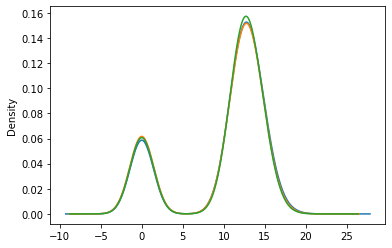

In [ ]:
amostra1["Curricular units 2nd sem (grade)"].plot(kind='density')
amostra2["Curricular units 2nd sem (grade)"].plot(kind='density')
amostra3["Curricular units 2nd sem (grade)"].plot(kind='density')
plt.show()

##Teste de dependência entre as amostras

In [ ]:
# Exemplo de Teste de CorrelaÇão de Pearson
from scipy.stats import pearsonr

data1 = df_grade1
data2 = df_grade2
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=0.017, p=0.633
Provavelmente Independente


##Teste de equidade entre as amostras

In [ ]:
# Examplo de Teste T - Student
from scipy.stats import ttest_ind

data1 = df_grade1
data2 = df_grade2
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

stat=0.784, p=0.433
Provavelmente a mesma distribuição


##Boxplot

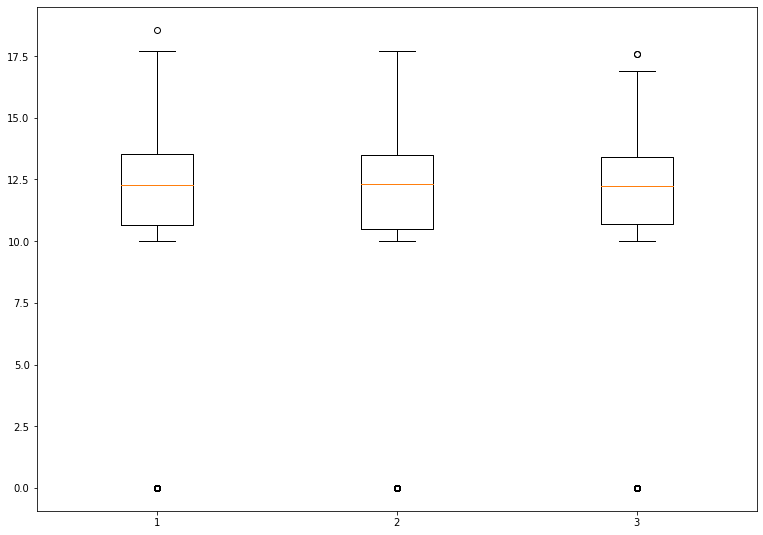

In [ ]:
data = [amostra1["Curricular units 2nd sem (grade)"], amostra2["Curricular units 2nd sem (grade)"], amostra3["Curricular units 2nd sem (grade)"]]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [ ]:
X_train.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (failed),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (failed)
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,132.880205,127.364266,23.544274,10.546726,10.071509,11.625541,1.248878,-0.026478,6.391972,4.827627,1.564345,6.355372,4.567100,1.788272
std,13.317072,14.656603,7.943062,5.038980,5.458747,2.676845,1.390852,2.255465,2.616694,3.288042,2.054065,2.285016,3.208123,2.238715
min,96.000000,95.000000,17.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,118.000000,19.000000,11.000000,10.600000,9.400000,0.300000,-1.700000,5.000000,3.000000,0.000000,5.000000,2.000000,0.000000
50%,133.100000,126.300000,20.000000,12.400000,12.333333,11.100000,1.400000,0.320000,6.000000,5.000000,1.000000,6.000000,5.000000,1.000000
75%,140.000000,135.100000,26.000000,13.483333,13.500000,13.900000,2.600000,1.790000,7.000000,6.000000,2.000000,7.000000,6.000000,3.000000
max,188.000000,190.000000,62.000000,18.875000,18.571429,16.200000,3.700000,3.510000,26.000000,26.000000,9.000000,23.000000,20.000000,9.000000


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=amostra1["Curricular units 2nd sem (grade)"]))
fig.add_trace(go.Box(y=amostra2["Curricular units 2nd sem (grade)"]))
fig.add_trace(go.Box(y=amostra3["Curricular units 2nd sem (grade)"]))

fig.show()


##Conclusões

Uma conclusão mais elaborada será feita posteriormente, pois mais análises ainda precisam ser feitas. Porém, conseguimos alguns bons insights, por exemplo, a nova variável criada, quantidade de reprovações, mostrou ser bem relevante, com um grau de correlação negativa de -0.74, o que significa que quanto mais reprovações, maior a tendência de largar a faculdade. Isso é uma informação extremamente útil para gestores saberem quais estudantes demandam mais atenção e estão em mais risco.  Além disso, outras variáveis mostraram ter bastante relevância, como por exemplo, a nota dos alunos no primeiro semestre e também no segundo. A conclusão é que talvez seja possível usar mais de uma variável, um modelo com variáveis compostas, para tentar examinar se conseguimos prever com uma maior precisão a chance de alguém evadir, vários itens com uma correlação razoável podem ser agrupados numa tentativa de prever melhor algum padrão.  


# Explorando o KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math

In [ ]:
#removendo outliers
# drop_grad_features = drop_grad_features.loc[drop_grad_features['Curricular units 2nd sem (grade)'] > 9]
# drop_grad_features = drop_grad_features.loc[drop_grad_features['Curricular units 1st sem (grade)'] > 9]

In [ ]:
data_columns = ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (failed)", "Target_Graduate"]
data_knn = drop_grad_features[data_columns]
train, test = train_test_split(data_knn, test_size=0.3, shuffle=True, random_state=0)

In [ ]:
feats = ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (failed)"]
X_train_knn = train[feats]
y_train_knn = train["Target_Graduate"]

In [ ]:
feats = ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Curricular units 1st sem (failed)", "Curricular units 2nd sem (failed)"]
X_test_knn = test[feats]
y_test_knn = test["Target_Graduate"]

In [ ]:
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

In [ ]:
math.sqrt(len(y))

60.249481325568276

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=53, p=2, metric="euclidean")
model_knn.fit(X_train_knn, y_train_knn)
y_pred_knn = model_knn.predict(X_test_knn)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[323, 109],
       [ 21, 636]])

In [ ]:
print(metrics.f1_score(y_test_knn, y_pred_knn))
print(metrics.accuracy_score(y_test_knn, y_pred_knn))
print(metrics.classification_report(y_test_knn, y_pred_knn))

0.9072753209700427
0.8806244260789715
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       432
           1       0.85      0.97      0.91       657

    accuracy                           0.88      1089
   macro avg       0.90      0.86      0.87      1089
weighted avg       0.89      0.88      0.88      1089



In [ ]:
# rodando o modelo para 30 amostras aleatorias
results_knn = []
accuracy_knn = []
for i in range(0,30):
  sample = test.sample(frac=0.3)
  X = sample[feats]
  y = sample["Target_Graduate"]
  X = scaler.transform(X)
  y_pred = model_knn.predict(X)
  accuracy_knn.append(metrics.accuracy_score(y, y_pred))
  results_knn.append((y, y_pred))

#Análise comparativa entre regressão linear e polinomial

##Regressão Linear

In [ ]:
#removendo outliers
# drop_grad_features = drop_grad_features.loc[drop_grad_features['Curricular units 2nd sem (grade)'] > 9]
# drop_grad_features = drop_grad_features.loc[drop_grad_features['Curricular units 1st sem (grade)'] > 9]

Text(0, 0.5, 'Curricular units 2nd sem (grade)')

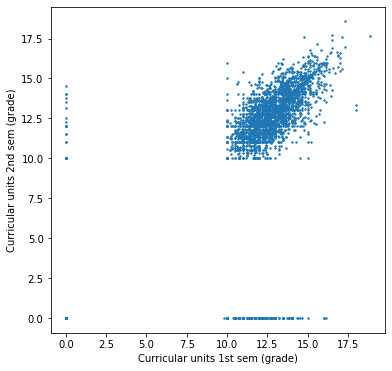

In [ ]:
scalerLinearReg = StandardScaler()
features = ["Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)"]
dataLinearReg = drop_grad_features[features]
x = dataLinearReg["Curricular units 1st sem (grade)"].values.reshape(-1, 1)
y = dataLinearReg["Curricular units 2nd sem (grade)"].values.reshape(-1, 1)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel("Curricular units 1st sem (grade)")
plt.ylabel("Curricular units 2nd sem (grade)")


b0: [0.37797733] b1: [[0.91678277]]


Text(0, 0.5, 'Curricular units 2nd sem (grade)')

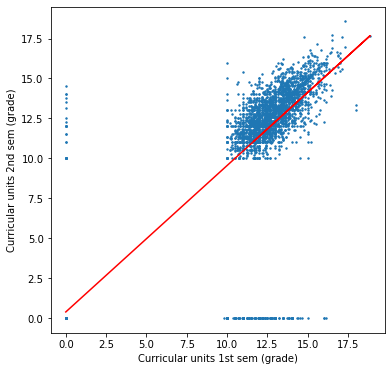

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

print('b0: {} b1: {}'.format(model.intercept_, model.coef_))
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, c='red')
plt.xlabel("Curricular units 1st sem (grade)")
plt.ylabel("Curricular units 2nd sem (grade)")

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.7154854032652822
8.547165070149562


##Regressão polinomial

[0.44646331] [[0.         0.80061562 0.00846037]]
(327, 4)


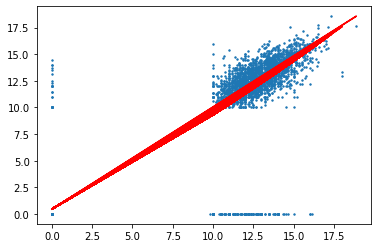

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
poly.fit(x, y)
poly_X = poly.transform(x)

reg = LinearRegression()
reg.fit(poly_X, y)

print(reg.intercept_, reg.coef_)
print(X.shape)
y_pred = reg.predict(poly_X)
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, color='red')

In [ ]:
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.7160750598425594
8.529451068272229


#Regressão Logística

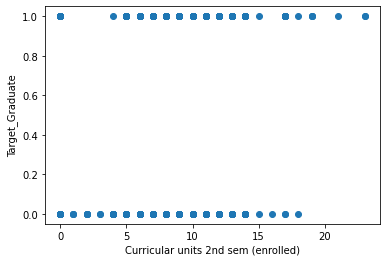

In [ ]:
plt.xlabel("Curricular units 2nd sem (enrolled)")
plt.ylabel("Target_Graduate")
print(plt.scatter(x=drop_grad_features['Curricular units 2nd sem (enrolled)'], y=drop_grad_features['Target_Graduate']))

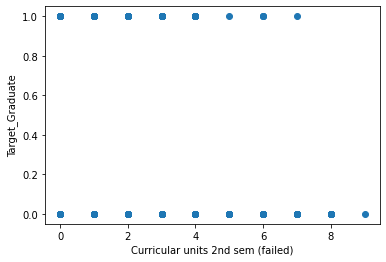

In [ ]:
plt.xlabel("Curricular units 2nd sem (failed)")
plt.ylabel("Target_Graduate")
plt.scatter(x=drop_grad_features["Curricular units 2nd sem (failed)"], y=drop_grad_features['Target_Graduate'])

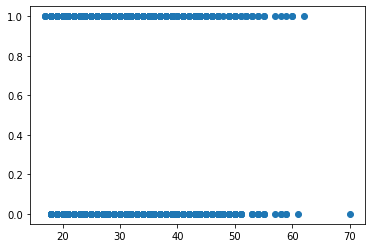

In [ ]:
print(plt.scatter(x=drop_grad_features["Age at enrollment"], y=drop_grad_features['Target_Graduate']))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

feats = ["Curricular units 2nd sem (failed)", "Curricular units 2nd sem (enrolled)", "Age at enrollment"]
data_columns = ["Curricular units 2nd sem (failed)", "Curricular units 2nd sem (enrolled)", "Age at enrollment", "Target_Graduate"]

data_log = drop_grad_features[data_columns]

train_log, test_log = train_test_split(data_log, test_size=0.3, shuffle=True, random_state=0)

X_train_log = train_log[feats]
y_train_log = train_log["Target_Graduate"]

X_test_log = test_log[feats]
y_test_log = test_log["Target_Graduate"]

model_log = LogisticRegression(C=1e15, max_iter=1000, solver='newton-cg')
model_log.fit(X_train_log, y_train_log)

LogisticRegression(C=1000000000000000.0, max_iter=1000, solver='newton-cg')

In [ ]:
y_pred_log = model_log.predict(X_test_log)

print(metrics.classification_report(y_test_log, y_pred_log))
print(confusion_matrix(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       432
           1       0.85      0.95      0.90       657

    accuracy                           0.87      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.87      0.87      0.87      1089

[[323 109]
 [ 32 625]]


In [ ]:
# rodando o modelo para 30 amostras aleatorias
results_log = []
accuracy_log = []
for i in range(0,30):
  sample = test_log.sample(frac=0.3)
  X = sample[feats]
  y = sample["Target_Graduate"]
  y_pred = model_log.predict(X)
  accuracy_log.append(metrics.accuracy_score(y, y_pred))
  results_log.append((y, y_pred))

#Regressão logística X KNN (Teste estatístico)

In [ ]:
print("Resultados da reg. logística:")
print(metrics.classification_report(y_test_log, y_pred_log))
print("tn, fp, fn, tp")
print(confusion_matrix(y_test_log, y_pred_log).ravel())

print("\nResultados do KNN:")
print(metrics.classification_report(y_test_knn, y_pred_knn))
print("tn, fp, fn, tp")
print(confusion_matrix(y_test_knn, y_pred_knn).ravel())

Resultados da reg. logística:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       432
           1       0.85      0.95      0.90       657

    accuracy                           0.87      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.87      0.87      0.87      1089

tn, fp, fn, tp
[323 109  32 625]

Resultados do KNN:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       432
           1       0.85      0.97      0.91       657

    accuracy                           0.88      1089
   macro avg       0.90      0.86      0.87      1089
weighted avg       0.89      0.88      0.88      1089

tn, fp, fn, tp
[323 109  21 636]


Text(0, 0.5, 'Acurácia')

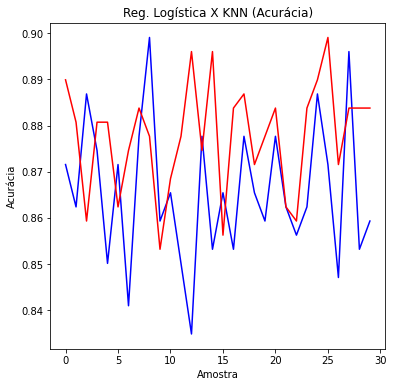

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(accuracy_log, c='blue')
plt.plot(accuracy_knn, c='red')
plt.title("Reg. Logística X KNN (Acurácia)")
plt.xlabel("Amostra")
plt.ylabel("Acurácia")

In [ ]:
print("Acurácia média das amostras rodando a regressão lógistica:")
print(sum(accuracy_log)/len(accuracy_log))
print("Acurácia média das amostras rodando o KNN:")
print(sum(accuracy_knn)/len(accuracy_knn))

Acurácia média das amostras rodando a regressão lógistica:
0.8656472986748217
Acurácia média das amostras rodando o KNN:
0.8777777777777779


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

data = drop_grad_features.drop('Target_Graduate', axis=1)
target = drop_grad_features["Target_Graduate"]

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model_knn, 
                          estimator2=model_log, 
                          X=data, 
                          y=target, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. \
    \nWe may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis. \
    \nWe may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.000
The t-statistics is = -11.322
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset.     
We may conclude that the two algorithms are significantly different.


#Conclusão

As hipóteses levantadas ao fim da análise exploratória de dados se mostraram bastante sólidas. Usamos as variaveis que se mostraram mais promissoras para a construção de modelos de classificação e obtivemos resultados bem satisfatorios. Experimentamos uma regressão linear simples e uma regressão polinomial de segundo grau com as médias das notas do primeiro e segundo semestre, estes modelos apresentaram resultados extremamente próximos, com R2 em 0,71 e MSE em 8,5. Já para os métodos de classificação experimentamos e comparamos a regressão logística e o KNN, que tiveram uma acuracia média de 86,5% e 87,7% respectivamente, aplicamos o teste estatístico "5x2cv paired t test" e vimos que, com 95% de significancia, os modelos possuem performances signiticativamente diferentes, logo podemos indicar o KNN como mais adequado para nosso problema.